In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import seaborn as sns
sns.set_style()
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
#from xgboost import XGBClassfier

In [2]:
df = pd.read_csv('new_data.csv')
df.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,total_grade_1st_sem,total_grade_2nd_sem,admission_grade_per_age,log_course
0,1,17,5,1,1,122.0,1,19,12,5,...,0.000000,0,10.8,1.4,1.74,0,0.000000,0.000000,6.365000,5.141664
1,1,15,1,1,1,160.0,1,1,3,3,...,13.666667,0,13.9,-0.3,0.79,1,5.333333,5.277778,7.500000,9.132811
2,1,1,5,1,1,122.0,1,37,37,9,...,0.000000,0,10.8,1.4,1.74,0,1.000000,1.000000,6.568421,9.112728
3,1,17,2,1,1,122.0,1,38,37,5,...,12.400000,0,9.4,-0.8,-3.12,1,5.571429,5.566667,5.980000,9.187379
4,2,39,1,0,1,100.0,1,37,38,9,...,13.000000,0,13.9,-0.3,0.79,1,5.388889,5.166667,3.144444,8.988945


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Daytime/evening attendance	                     4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
df.Target.value_counts()

Target
0    2215
1    2209
Name: count, dtype: int64

In [5]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
Internationa

In [6]:
#there are no duplicates in the data
df.duplicated().sum()

0

In [7]:
for c in df.columns:
    if df[c].dtype == 'object':
        print(c)

In [8]:
#there are no object variables
#since this is the dataset that has already been cleaned, we will go straight to the task at hand

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [10]:
#splitting into train and test sets
x = df.drop('Target',axis = 1)
y = df.Target

In [11]:
#df.iloc[:2000,:]

In [12]:
0.6 *4424

2654.4

In [13]:
#scaling the x values to have the values on the same scale
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,total_grade_1st_sem,total_grade_2nd_sem,admission_grade_per_age,log_course
0,-0.294829,-0.095470,2.490896,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,-0.225661,...,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-2.278085,-2.311974,0.337225,-4.180214
1,-0.294829,-0.209869,-0.554068,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,-0.301375,...,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,0.091473,0.156953,1.108152,0.223817
2,-0.294829,-1.010660,2.490896,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,-0.074233,...,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.833793,-1.844177,0.475395,0.201656
3,-0.294829,-0.095470,0.207173,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,-0.225661,...,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,0.197257,0.292094,0.075721,0.284030
4,1.356212,1.162916,-0.554068,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,-0.074233,...,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,0.116156,0.104975,-1.850276,0.065069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.350082,-0.35023,-0.577342,-0.126298,-1.189759,-1.386793,-0.225661,...,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667,0.061854,0.156953,0.382447,0.284030
4420,-0.294829,-1.010660,0.207173,0.350082,-0.35023,-0.956508,14.916228,-1.189759,-1.386793,-0.074233,...,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126,-0.056624,-0.362821,0.504391,0.284030
4421,-0.294829,-1.010660,-0.554068,0.350082,-0.35023,1.621820,-0.126298,1.117723,0.959802,-0.074233,...,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199,0.455237,0.143958,-0.601246,0.252767
4422,-0.294829,-1.010660,-0.554068,0.350082,-0.35023,3.593483,-0.126298,1.117723,0.959802,-0.149947,...,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511,-0.145483,-0.128923,1.237206,0.210984


In [14]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [15]:
#train sets
x_train = x_scaled.iloc[:2650,:]
y_train = y.iloc[:2650]

#validation sets
x_val = x_scaled.iloc[2650:3650,:]
y_val = y.iloc[2650:3650]

#test sets
x_test = x_scaled.iloc[3650:,:]
y_test = y.iloc[3650:]

In [16]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape

((2650, 39), (2650,), (774, 39), (774,), (1000, 39), (1000,))

#### Model building

In [17]:
#building the baseline model, Logistic Regression model


In [18]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [19]:
log_model.score(x_train,y_train)

0.8539622641509435

In [20]:
log_model.score(x_val,y_val)

0.843

In [21]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_model, x_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.84150943 0.83018868 0.83396226 0.85849057 0.84528302]
Mean cross-validation score: 0.8418867924528304


In [22]:
##the train and validation model scores are not too far apart, which suggests that the model is not overfitting too much

In [23]:
#making predictions
y_pred = log_model.predict(x_test)
#y_pred

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[318,  79],
       [ 50, 327]], dtype=int64)

In [25]:
#(318+327)/(318+327+50+79)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       397
           1       0.81      0.87      0.84       377

    accuracy                           0.83       774
   macro avg       0.83      0.83      0.83       774
weighted avg       0.84      0.83      0.83       774



In [27]:
log_model_acc = accuracy_score(y_test,y_pred)
log_model_acc

0.8333333333333334

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8341907809900514

In [29]:
pickle.dump(log_model,open('log_model.pkl','wb'))

##### Implementing traditional machine learning models
* Decision trees
* Random forests
* SVM
* Gradient boosting

In [30]:
from xgboost import XGBClassifier
models = {'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'Support Vector Machines':SVC(),
          'XGB':XGBClassifier()}

model_score = {}
def fit_and_score(models,x_train,y_train,x_val,y_val):

    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_val,y_val)
    return model_score
fit_and_score(models,x_train,y_train,x_val,y_val)


{'DecisionTreeClassifier': 0.786,
 'RandomForestClassifier': 0.839,
 'Support Vector Machines': 0.84,
 'XGB': 0.842}

In [31]:
#taking each model separately
#Decision trees

In [32]:
dec_model = DecisionTreeClassifier()
dec_model.fit(x_train,y_train)
dec_model.score(x_val,y_val)

0.768

In [33]:
cv_scores = cross_val_score(dec_model, x_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.77358491 0.77169811 0.76981132 0.77924528 0.78301887]
Mean cross-validation score: 0.7754716981132075


In [34]:
y_pred = dec_model.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       397
           1       0.77      0.80      0.78       377

    accuracy                           0.79       774
   macro avg       0.79      0.79      0.79       774
weighted avg       0.79      0.79      0.79       774



In [36]:
dec_model_acc = accuracy_score(y_test,y_pred)
dec_model_acc

0.7855297157622739

In [37]:
confusion_matrix(y_test,y_pred)

array([[305,  92],
       [ 74, 303]], dtype=int64)

In [38]:
roc_auc_score(y_test,y_pred)

0.7859877462934877

In [39]:
pickle.dump(dec_model,open('dec_model.pkl','wb'))

In [40]:
#Randomforest model

rand_model = RandomForestClassifier()
rand_model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
rand_model.score(x_train,y_train)

1.0

In [42]:
rand_model.score(x_val,y_val)

0.845

In [43]:
y_pred = rand_model.predict(x_test)

In [44]:
cross_val = cross_val_score(rand_model,x_train,y_train,cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cross_val)
print("Mean cross-validation score:", cross_val.mean())


Cross-validation scores: [0.83773585 0.83773585 0.8490566  0.8509434  0.84150943]
Mean cross-validation score: 0.8433962264150944


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       397
           1       0.80      0.87      0.83       377

    accuracy                           0.83       774
   macro avg       0.83      0.83      0.83       774
weighted avg       0.83      0.83      0.83       774



In [46]:
rand_model_acc = accuracy_score(y_test,y_pred)

In [47]:
roc_auc_score(y_test,y_pred)

0.830546071664807

In [48]:
pickle.dump(rand_model,open('rand_model.pkl','wb'))

In [49]:
#support vector classifier

In [50]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [51]:
svc.score(x_val,y_val)

0.84

In [52]:
cv_scores = cross_val_score(svc,x_train,y_train,cv = 5)

print('Scores are ',cv_scores)
print("Mean score is ", cv_scores.mean())

Scores are  [0.82264151 0.80566038 0.8245283  0.84528302 0.84339623]
Mean score is  0.8283018867924528


In [53]:
y_pred = svc.predict(x_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       397
           1       0.77      0.87      0.82       377

    accuracy                           0.81       774
   macro avg       0.82      0.82      0.81       774
weighted avg       0.82      0.81      0.81       774



In [55]:
svc_acc = accuracy_score(y_test,y_pred)

In [56]:
svc_acc

0.813953488372093

In [57]:
roc_auc_score(y_test,y_pred)

0.8154327215388624

In [58]:
confusion_matrix(y_test,y_pred)

array([[301,  96],
       [ 48, 329]], dtype=int64)

In [59]:
pickle.dump(svc,open('svc_model.pkl','wb'))

In [60]:
#Xgboost classifier

In [61]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_val,y_val)

0.842

In [62]:
cv_scores = cross_val_score(xgb,x_train,y_train,cv = 5)

print('Scores are ',cv_scores)
print("Mean score is ", cv_scores.mean())

Scores are  [0.83962264 0.83396226 0.8490566  0.84339623 0.85283019]
Mean score is  0.8437735849056605


In [63]:
y_pred = xgb.predict(x_test)

In [64]:
xgb_acc = accuracy_score(y_test,y_pred)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       397
           1       0.80      0.87      0.83       377

    accuracy                           0.83       774
   macro avg       0.83      0.83      0.83       774
weighted avg       0.83      0.83      0.83       774



In [66]:
confusion_matrix(y_test,y_pred)

array([[315,  82],
       [ 50, 327]], dtype=int64)

In [67]:
roc_auc_score(y_test,y_pred)

0.8304124434585652

In [68]:
pickle.dump(xgb,open('xgb_model.pkl','wb'))

In [69]:
acc_table = pd.DataFrame([dec_model_acc,log_model_acc,rand_model_acc,xgb_acc,svc_acc],columns=['accuracy'],
                         index=['DecisionTrees',
                                'LogisticRegression',
                                'RandomForestClassifier',
                                'XGBClassifier',
                                'SVC'])

In [70]:
acc_table

,accuracy
DecisionTrees,0.785530
LogisticRegression,0.833333
RandomForestClassifier,0.829457
XGBClassifier,0.829457
SVC,0.813953


<Axes: >

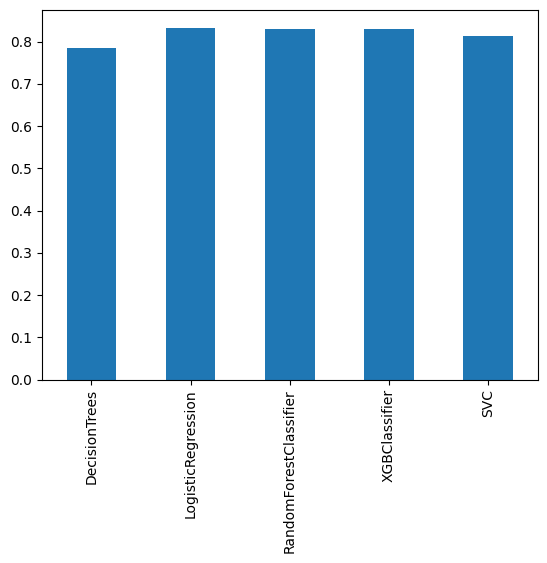

In [71]:
acc_table.accuracy.plot.bar()

In [72]:
#of the tradtional models, Randomforest has the highest accuracy

In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
model = keras.Sequential([
    keras.layers.Dense(24,input_shape=(39,),activation = 'relu'),
    keras.layers.Dense(12,activation = 'relu'),
    keras.layers.Dense(4,activation = 'relu'),
    #keras.layers.Dense(2,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

c:\Users\OLU-JUNAID & CO\Desktop\cloneinternship\3signet_internship\sigenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317 (5.14 KB)

 Trainable params: 1,317 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs = 100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5545 - loss: 0.6957 - val_accuracy: 0.7140 - val_loss: 0.5852
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.5646 - val_accuracy: 0.7730 - val_loss: 0.5015
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7666 - loss: 0.4730 - val_accuracy: 0.8010 - val_loss: 0.4456
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.4193 - val_accuracy: 0.8190 - val_loss: 0.4136
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.3770 - val_accuracy: 0.8170 - val_loss: 0.3976
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.3443 - val_accuracy: 0.8190 - val_loss: 0.4022
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.3495 - val_accuracy: 0.8180 - val_loss: 0.4043
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8502 - loss: 0.3311 - val_accuracy: 0.8220 - v

In [77]:
y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [78]:
y_pred

array([[9.99886751e-01],
       [9.43121374e-01],
       [9.96322393e-01],
       [9.90955949e-01],
       [9.59816515e-01],
       [9.77918386e-01],
       [3.13093327e-02],
       [9.10608292e-01],
       [9.98569250e-01],
       [9.58542943e-01],
       [1.76936112e-06],
       [9.99881744e-01],
       [9.51646388e-01],
       [7.68880010e-01],
       [9.98689651e-01],
       [3.81707370e-01],
       [1.96551136e-05],
       [3.41750139e-09],
       [9.99986529e-01],
       [8.35487783e-01],
       [9.99799132e-01],
       [6.75041883e-05],
       [9.99833584e-01],
       [9.65844631e-01],
       [9.03912842e-01],
       [9.57616806e-01],
       [1.26881923e-05],
       [5.64706575e-08],
       [9.77050960e-01],
       [9.89838600e-01],
       [2.76748054e-02],
       [9.57676053e-01],
       [2.71114077e-12],
       [7.90513635e-01],
       [1.40221655e-05],
       [9.58486676e-01],
       [3.53177227e-02],
       [1.02214743e-08],
       [1.37911027e-03],
       [1.95966288e-03],


In [79]:
#confusion_matrix(y_test,y_pred)

In [80]:
y_p = []
for element in y_pred:
    if element > 0.45:
        y_p.append(1)
    
    else:
        y_p.append(0)

In [81]:
y_p

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,


In [82]:
confusion_matrix(y_test,y_p)

array([[298,  99],
       [ 55, 322]], dtype=int64)

In [83]:
pickle.dump(model,open('dl.pkl','wb'))

In [84]:
roc_auc_score(y_test,y_p)

0.8023705643787291

#### WEEK 5

##### Manual tuning 

In [85]:
#we are going to pick a high performing model and tune the parameters to obtain a better accuracy

In [86]:
#the best peforming model is the logistic regression model

In [87]:
log_model = LogisticRegression(verbose=1,
                               n_jobs=2,
                               random_state=42,
                               max_iter=50)

log_model.fit(x_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=50, n_jobs=2, random_state=42, verbose=1)

In [88]:
log_model.score(x_val,y_val)

0.843

In [89]:
log_model.score(x_test,y_test)

0.8333333333333334

In [90]:
#the manual tuning did not improve the performance of the model

##### Hyperparameter Tuning

In [91]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'sag'],
        'max_iter': [100, 200, 500],
        'tol': [1e-4, 1e-3, 1e-2]
    },
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [100, 200, 500],
        'tol': [1e-4, 1e-3, 1e-2]
    }
]

# Perform the grid search
random_search = RandomizedSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', error_score='raise')
random_search.fit(x_train, y_train)
# Print the best parameters and score
print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')
# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
print(f'Best score: {accuracy_score(y_test, y_pred)}')


Best parameters: {'tol': 0.01, 'solver': 'sag', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
Best score: 0.8456603773584905
Best score: 0.8294573643410853


##### Advanced Ensemble methods

In [92]:
from sklearn.ensemble import StackingClassifier


# Define the base models (you can add more base models here)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True)),
]

# Define the meta-model (you can choose any classifier here)
meta_model = LogisticRegression()

# Build the stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Make predictions
y_pred = stacking_model.predict(x_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {accuracy * 100:.2f}%")

Stacking Ensemble Accuracy: 83.46%


##### Blending technique

In [93]:
# Base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(kernel='linear', probability=True, random_state=42)

# Train the base models on the training set
rf.fit(x_train, y_train)
svc.fit(x_train, y_train)


# Generate predictions on the validation set
val_pred_rf = rf.predict_proba(x_val)[:, 1]  # Use probabilities for binary classification
val_pred_svc = svc.predict_proba(x_val)[:, 1]


# Stack the predictions as new features for the blending model
val_predictions = np.column_stack((val_pred_rf, val_pred_svc))

# Blending model (Meta-model)
blender = LogisticRegression()

# Train the blending model on the predictions of the base models
blender.fit(val_predictions, y_val)

# Make predictions on the test set using the base models
test_pred_rf = rf.predict_proba(x_test)[:, 1]
test_pred_svc = svc.predict_proba(x_test)[:, 1]


# Stack the test set predictions to feed to the blending model
test_predictions = np.column_stack((test_pred_rf, test_pred_svc))

# Make final predictions using the blending model
final_pred = blender.predict(test_predictions)

# Evaluate the performance of the blending model
accuracy = accuracy_score(y_test, final_pred)
print(f"Blending Model Accuracy: {accuracy * 100:.2f}%")


Blending Model Accuracy: 84.24%


##### Feature importance

In [94]:
#Randomforest feature importance

In [95]:
rand_model.feature_importances_

array([0.0018942 , 0.01474286, 0.00994338, 0.00192881, 0.00390549,
       0.02574328, 0.00207841, 0.01395138, 0.01552235, 0.016824  ,
       0.01925334, 0.03106903, 0.00530132, 0.00091679, 0.01052876,
       0.02652945, 0.00767738, 0.0143714 , 0.02026477, 0.00120422,
       0.0056821 , 0.01373192, 0.03600938, 0.09824562, 0.0538033 ,
       0.00411631, 0.00433664, 0.01809416, 0.03067715, 0.18884441,
       0.06975222, 0.00311118, 0.01510186, 0.01544836, 0.01489231,
       0.05737492, 0.06364051, 0.03577627, 0.02771076])

##### Model interpretability using SHAP

In [97]:
import shap

c:\Users\OLU-JUNAID & CO\Desktop\cloneinternship\3signet_internship\sigenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [108]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

shap_values.shape

(774, 39, 2)

In [109]:
explainer.expected_value

array([0.48916981, 0.51083019])

In [124]:
shap_values[0][0,:]

array([ 0.00050525, -0.00050525])

In [126]:
x_test.iloc[0,:]

Marital status                                   -0.294829
Application mode                                  1.391714
Application order                                -0.554068
Daytime/evening attendance\t                      0.350082
Previous qualification                           -0.350230
Previous qualification (grade)                    0.180990
Nacionality                                      -0.126298
Mother's qualification                           -1.189759
Father's qualification                            1.024985
Mother's occupation                              -0.301375
Father's occupation                              -0.080456
Admission grade                                  -0.039924
Displaced                                         0.907512
Educational special needs                        -0.107993
Debtor                                           -0.358167
Tuition fees up to date                           0.368135
Gender                                           -0.7365

In [106]:
# Visualize the SHAP values for one instance (local interpretability)
shap.initjs()

#If binary classification or regression
shap.force_plot(explainer.expected_value, shap_values[0, :], x_test.iloc[0, :])

# Plot the global feature importance (summary plot)
shap.summary_plot(shap_values[0], x_test)


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

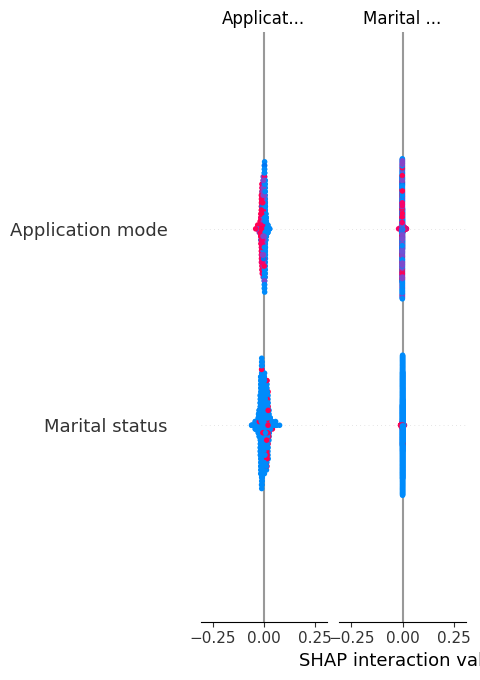

In [107]:
# Summary plot of SHAP values for the entire test set
shap.summary_plot(shap_values, x_test)


